<a href="https://colab.research.google.com/github/Enriquebadenas/Enriquebadenas/blob/main/Trabajo_grupo_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**TRABAJO GRUPAL. GRUPO 5 - 24 DE DICIEMBRE.**


**Introducción**



Hemos escogido el dataset “SydneyHousePrices”, que nos habla sobre cómo han variado los precios de venta de las propiedades en un periodo de tiempo establecido. La muestra estadística es de n=199504, resulta muy interesante poder analizar sus datos pero a la vez ha resultado un tanto problemático debido a la gran cantidad de datos a analizar, por lo que el proceso de limpieza, organización de tareas, relación de variables ha sido de gran dificultad. Sin embargo, hemos sido capaces de poder organizarnos correctamente para poder extraer el mayor número de conclusiones estadísticas a cerca del dataset.   

En primer lugar hemos creado numerosos histogramas y picado código que nos muestre los estadísticos más importantes tanto a nivel escrito como visual, de esta forma ya nos íbamos haciendo una idea de cómo iba a ser el comportamiento de las variables de la muestra.

A continuación, hemos escogido como variable target “sellPrice”, que hace referencia a los precios de venta de las propiedades. Al haber tanta diversidad en los precios hemos visto oportuno la recodificación de la variable en “sellPrice_str”, dividiendo los precios en tres categorías: “low rentals”, “average rentals” y “high rentals”. Esto supone transformar la variable de origen (cuantitativa) en variable cualitativa para poder analizar con mayor facilidad sus estadísticos. Sin embargo, en varias hipótesis (H3, H4, H5) hemos utilizado la variable de origen cuantitativa para poder sacar la correlación. La hipótesis más complicada de analizar ha sido la número 2, para ver si influía el código postal en el precio de venta de la vivienda.









1. **Importación de librerias y del dataset.**

En este apartado, se va a proceder a la importación de las librerias, las cuales se van a utilizar para desarrollar este proyecto y el dataset escogido.

In [ ]:

import os
from google.colab import drive 
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sns
from pandas.api.types import CategoricalDtype
import scipy.stats as stats
import seaborn as sns
from scipy.stats.stats import pearsonr
from statsmodels.formula.api import ols
#from stargazer.stargazer import Stargazer

drive.mount('mydrive')

Drive already mounted at mydrive; to attempt to forcibly remount, call drive.mount("mydrive", force_remount=True).


In [ ]:
# RUTA DE LECTURA DEL FICHERO DE DATOS
#df = pd.read_csv('/content/mydrive/MyDrive/TRABAJO 24 D EDEM/SydneyHousePrices.csv', parse_dates=['Date'], index_col=['Date']) 
df = pd.read_csv('/content/mydrive/MyDrive/Colab Notebooks/SydneyHousePrices.csv', parse_dates=['Date'], index_col=['Date'])
#df = pd.read_csv('/content/mydrive/MyDrive/Colab Notebooks/SydneyHousePrices.csv')  

In [ ]:
df

,Id,suburb,postalCode,sellPrice,bed,bath,car,propType
Date,,,,,,,,
2019-06-19,1,Avalon Beach,2107,1210000,4.0,2,2.0,house
2019-06-13,2,Avalon Beach,2107,2250000,4.0,3,4.0,house
2019-06-07,3,Whale Beach,2107,2920000,3.0,3,2.0,house
2019-05-28,4,Avalon Beach,2107,1530000,3.0,1,2.0,house
2019-05-22,5,Whale Beach,2107,8000000,5.0,4,4.0,house
...,...,...,...,...,...,...,...,...
2014-06-20,199500,Illawong,2234,1900000,5.0,3,7.0,house
2014-05-26,199501,Illawong,2234,980000,4.0,3,2.0,house
2014-04-17,199502,Alfords Point,2234,850000,4.0,2,2.0,house


El dataset escogido trata sobre los precios de venta de las viviendas en Sydney. En este dataset hay tanto variables cualitatitivas como cuantitativas.

2. **Limpieza de la base de datos**


*Se va a proceder a realizar la limpieza de la base de datos mediante la sustitución de los valores faltantes por su media y la eliminación de aquellas filas con valores error, algunas de ellas tenían valores de 99 unidades que carcen de sentido en el conjunto de datos. Como se puede observar a continuación, dicho proceso se ha de realizar únicamente con las variables BED, BATH y CAR para valores superiores a 10.*

In [ ]:
df_mask=df['bed']>= 10
filtered_df = df[df_mask]
filtered_df

df_mask1=df['bath']>= 10
filtered_df1 = df[df_mask1]
filtered_df1

df_mask2=df['car']>= 10
filtered_df2 = df[df_mask2]
filtered_df2

,Id,suburb,postalCode,sellPrice,bed,bath,car,propType
Date,,,,,,,,
2018-07-03,2243,Blacktown,2148,2300000,4.0,2,30.0,house
2016-10-28,4154,Plumpton,2761,809000,4.0,3,10.0,house
2019-04-17,4234,Plumpton,2761,720000,3.0,1,10.0,house
2015-07-06,6403,Eschol Park,2558,562500,3.0,1,10.0,house
2013-11-02,7491,Killara,2071,10000000,5.0,7,12.0,house
...,...,...,...,...,...,...,...,...
2016-07-11,196627,Denistone,2114,3790000,10.0,5,12.0,house
2016-08-09,198863,Glen Alpine,2560,913000,5.0,3,11.0,house
2014-03-04,198907,Horsley Park,2175,1375000,5.0,3,12.0,house


In [ ]:
df = df.drop(df[df['bed']>=10].index)
df = df.drop(df[df['bath']>=10].index)
df = df.drop(df[df['car']>=10].index)


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 167760 entries, 2019-06-19 to 2011-04-16
Data columns (total 8 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   Id          167760 non-null  int64  
 1   suburb      167760 non-null  object 
 2   postalCode  167760 non-null  int64  
 3   sellPrice   167760 non-null  int64  
 4   bed         167627 non-null  float64
 5   bath        167760 non-null  int64  
 6   car         152249 non-null  float64
 7   propType    167760 non-null  object 
dtypes: float64(2), int64(4), object(2)
memory usage: 11.5+ MB


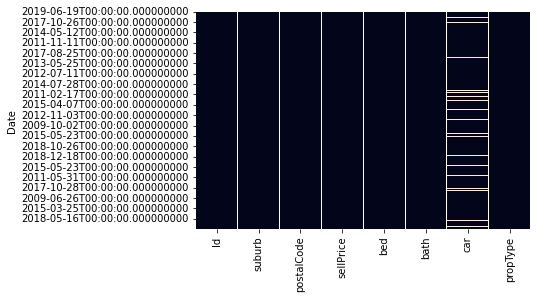

In [ ]:
df.isnull()
df.info(verbose=True,null_counts=True)
sns.heatmap(df.isnull(), cbar=False)

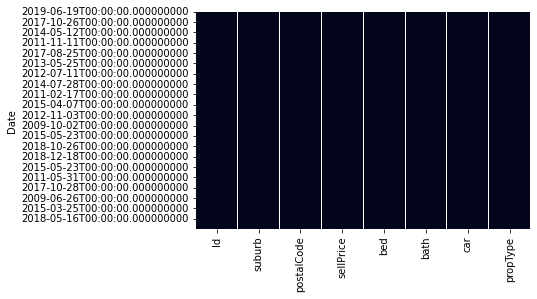

In [ ]:
mean_car = df.car.mean()
df.car = df.car.fillna(mean_car)
mean_bed = df.bed.mean()
df.bed = df.bed.fillna(mean_bed)
sns.heatmap(df.isnull(), cbar=False)

Tras la realización de estos procesos obtenemos un dataset limpio, sin valores anómalos ni datos Nan (not a number). Esto nos permite ya comenzar con el análisis del dataset.

3. **Descripción de la variable target: SELLPRICE**



En este apartado se realiza un análisis de la variable target, SELLPRICE. Este análisis se realiza mediante su descripción gráfica.
Además con el fin de facilitar la realización de las hipótesis, se realiza la categorización de dicha variable.

count    1.677600e+05
mean     1.261870e+06
std      7.564426e+06
min      1.000000e+00
25%      7.150000e+05
50%      9.750000e+05
75%      1.455000e+06
max      2.147484e+09
Name: sellPrice, dtype: float64

col_0              count
sellPrice_cat           
Low price      62.218050
Average price  22.440987
High price     15.340963

col_0          count
sellPrice_cat       
Low price       62.2
Average price   22.4
High price      15.3


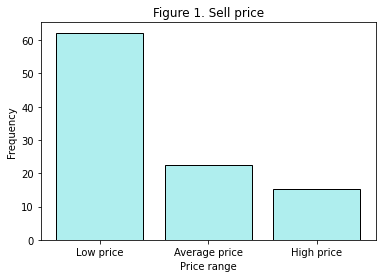

In [ ]:
res = df.sellPrice.describe()
print (res)
print()

m  = res[1]
sd = res[2]
n  = res[0]


df.loc[  (df['sellPrice']<1.197500e+06) ,"sellPrice_str"]= "Low price"
df.loc[ ((df['sellPrice']>= 1.197500e+06) & (df['sellPrice']<1.800000e+06)) ,"sellPrice_str"]= "Average price"
df.loc[  (df['sellPrice']>=1.800000e+06) ,"sellPrice_str"]= "High price"

my_categories=["Low price", "Average price", "High price"]
my_price_type = CategoricalDtype(categories=my_categories, ordered=True)
df["sellPrice_cat"] = df.sellPrice_str.astype(my_price_type)


mytable = pd.crosstab(df.sellPrice_cat, columns="count", normalize='columns')*100
print(mytable)
print()
print (round(mytable,1))
plt.bar(mytable.index, mytable['count'], color="paleturquoise", edgecolor='black')
plt.xlabel('Price range')
plt.ylabel('Frequency')
plt.title('Figure 1. Sell price')
plt.show()


En el diagrama de barras, o en la crosstab anterior, puede apreciarse como el 62% de las viviendas encajan an la categroría del rango bajo de precios, las de precio medio representan un 22%, y las de precio más alto un 15%.

  4. **Descripción de las variables predictoras.**


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 167760 entries, 2019-06-19 to 2011-04-16
Data columns (total 10 columns):
 #   Column         Non-Null Count   Dtype   
---  ------         --------------   -----   
 0   Id             167760 non-null  int64   
 1   suburb         167760 non-null  object  
 2   postalCode     167760 non-null  int64   
 3   sellPrice      167760 non-null  int64   
 4   bed            167760 non-null  float64 
 5   bath           167760 non-null  int64   
 6   car            167760 non-null  float64 
 7   propType       167760 non-null  object  
 8   sellPrice_str  167760 non-null  object  
 9   sellPrice_cat  167760 non-null  category
dtypes: category(1), float64(2), int64(4), object(3)
memory usage: 13.0+ MB


Con el fin de realizar el análisis de las variables predictoras, se ha de conocer el tipo de variable que es cada una. El tipo de cada variable se muestra arriba de estas líneas.

4.1-Variable número de Bed




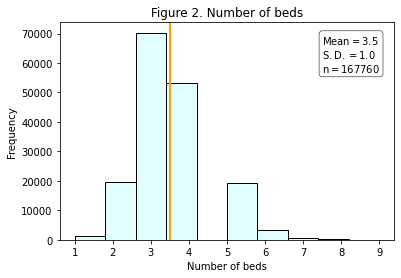

In [ ]:
ef = df['bed'].describe() 
n = df.bed.count() 
m_bed= df.bed.mean()
sd_bed = df.bed.std()

x = df['bed']
plt.hist(x,edgecolor='black', color="lightcyan", bins=10)
plt.title("Figure 2. Number of beds")
plt.ylabel('Frequency')
plt.xlabel('Number of beds')
props = dict(boxstyle='round', facecolor='white',lw=0.5)
textstr = '$\mathrm{Mean}=%.1f$\n$\mathrm{S.D.}=%.1f$\n$\mathrm{n}=%.0f$'%(m_bed, sd_bed, n)
plt.text (7.5,57000, textstr , bbox=props)
plt.axvline(x=m_bed, linewidth=2,linestyle= 'solid', color="orange", label='Mean')
plt.show()


La media de todas las casas incluidas en el dataset dispone de 3,5 dormitorios en los 167760 datos de la muestra. La desviación estándar es de 1.0 . La media de 3.5 indica que en el promedio de las muestras observadas, la mayoría de viviendas del dataset disponde de 3 o 4 dormitorios. 

4.2- Varaible número de Bath

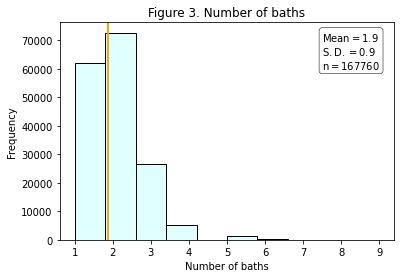

Date
2019-05-28    1
2019-04-13    1
2019-04-11    1
2019-02-20    1
2018-12-21    1
Name: bath, dtype: int64


In [ ]:
efe = df['bath'].describe() 
efe
n = df.bath.count() 
m_bath= df.bath.mean()
sd_bath = df.bath.std()

x = df['bath']
plt.hist(x,edgecolor='black', color="lightcyan", bins=10)
plt.title("Figure 3. Number of baths")
plt.ylabel('Frequency')
plt.xlabel('Number of baths')
props = dict(boxstyle='round', facecolor='white',lw=0.5)
textstr = '$\mathrm{Mean}=%.1f$\n$\mathrm{S.D.}=%.1f$\n$\mathrm{n}=%.0f$'%(m_bath, sd_bath, n)
plt.text (7.5,60000, textstr , bbox=props)
plt.axvline(x=m_bath, linewidth=2,linestyle= 'solid', color="orange", label='Mean')
plt.show()

print(df.bath.nsmallest(5))

La media de todas las casas incluidas en el dataset dispone de 1.9 baños en los 167760 datos de la muestra. La desviación estándar es de 0.9 . La media de baños en las viviendas del dataset dispone de "casi" dos baños, lo que se puede interpretar con que al menos disponen de uno y muchas de ellas diponen de 2 o más baños, colocando la media en 1.9. Hemos comprobado que en el dataset no hay viviendas con cero baños.

4.3- Variable número de plazas párking, Car

count    167760.000000
mean          1.916531
std           0.919145
min           1.000000
25%           1.000000
50%           2.000000
75%           2.000000
max           9.000000
Name: car, dtype: float64


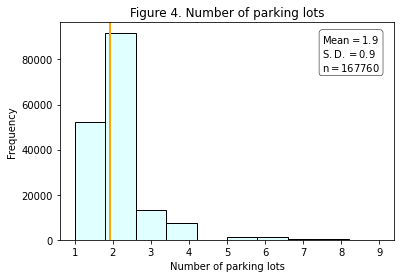

Date
2018-12-21    1.0
2018-12-05    1.0
2018-11-20    1.0
2018-10-10    1.0
2018-08-17    1.0
Name: car, dtype: float64


In [ ]:
efs = df['car'].describe() 
print(efs)
n = df.car.count() 
m_car= df.car.mean()
sd_car = df.car.std()

x = df['car']
plt.hist(x,edgecolor='black', color="lightcyan", bins=10)
plt.title("Figure 4. Number of parking lots")
plt.ylabel('Frequency')
plt.xlabel('Number of parking lots')
props = dict(boxstyle='round', facecolor='white',lw=0.5)
textstr = '$\mathrm{Mean}=%.1f$\n$\mathrm{S.D.}=%.1f$\n$\mathrm{n}=%.0f$'%(m_car, sd_car, n)
plt.text (7.5,75000, textstr , bbox=props)
plt.axvline(x=m_car, linewidth=2,linestyle= 'solid', color="orange", label='Mean')
plt.show()

print(df.car.nsmallest(5))

La media de todas las casas incluidas en el dataset dispone de 1.9 plazas de párking en los 167760 datos de la muestra. La desviación estándar es de 0.9 . La media de plazas de párking en las viviendas en el dataset es de "casi" dos plazas. Hemos comprobado que en el dataset no hay viviendas con ninguna plaza de párking.

4.4- Variable Property type

col_0                 count
propType                   
acreage                 0.0
duplex/semi-detached    3.4
house                  85.2
other                   0.2
terrace                 0.7
townhouse               7.6
villa                   2.9
warehouse               0.0


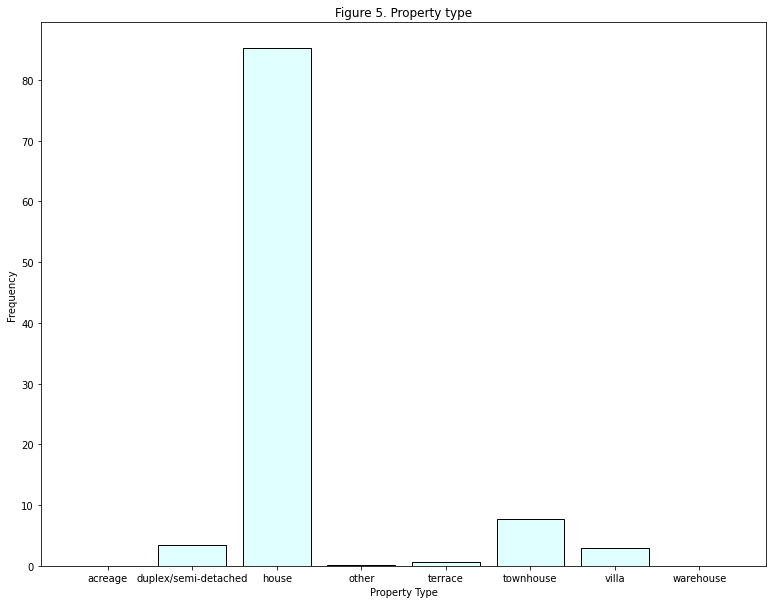

In [ ]:
mytable = pd.crosstab(df.propType, columns="count", normalize='columns')*100
# print(mytable)
print (round(mytable,1))
# print(mytable.sum())


plt.figure(figsize=(13,10))
plt.bar(mytable.index, mytable['count'], color="lightcyan", edgecolor='black')
plt.xlabel('Property Type')
plt.ylabel('Frequency')
plt.title('Figure 5. Property type')
plt.show()

El 85% de las viviendas a la venta pertenecen a la categoría "houses", siendo las más relevantes a continuación "townhouse" con un 7.6%, "duplex" 3.4% y "villa" 2.9% en la muestra de datos. En la crosstab anterior se muestran todos los porcentajes de cada tipo de vivienda.

4.5- Varaible Date

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 167760 entries, 2019-06-19 to 2011-04-16
Data columns (total 10 columns):
 #   Column         Non-Null Count   Dtype   
---  ------         --------------   -----   
 0   Id             167760 non-null  int64   
 1   suburb         167760 non-null  object  
 2   postalCode     167760 non-null  int64   
 3   sellPrice      167760 non-null  int64   
 4   bed            167760 non-null  float64 
 5   bath           167760 non-null  int64   
 6   car            167760 non-null  float64 
 7   propType       167760 non-null  object  
 8   sellPrice_str  167760 non-null  object  
 9   sellPrice_cat  167760 non-null  category
dtypes: category(1), float64(2), int64(4), object(3)
memory usage: 13.0+ MB
[1287.2154156973697, 1003.1279289714392, 1084.7954517766498, 1209.3762011331446, 1365.6269542262048, 1349.4254834423652, 1442.1767857682562, 1378.5966834834835, 1149.9404806482823]


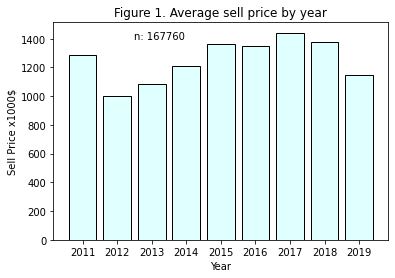

In [ ]:
df.info()

m_sellp_11= df['sellPrice']['2011'].mean()/1000
m_sellp_12= df['sellPrice']['2012'].mean()/1000
m_sellp_13= df['sellPrice']['2013'].mean()/1000
m_sellp_14= df['sellPrice']['2014'].mean()/1000
m_sellp_15= df['sellPrice']['2015'].mean()/1000
m_sellp_16= df['sellPrice']['2016'].mean()/1000
m_sellp_17= df['sellPrice']['2017'].mean()/1000
m_sellp_18= df['sellPrice']['2018'].mean()/1000
m_sellp_19= df['sellPrice']['2019'].mean()/1000
# divido por 1000 para cambiar la escala de millones a más pequeña y facilitar la lectura en el gráfico
preciomedioyear = [m_sellp_11, m_sellp_12,m_sellp_13,m_sellp_14,m_sellp_15,m_sellp_16,m_sellp_17,m_sellp_18,m_sellp_19,]
print(preciomedioyear)

n = df.sellPrice.count() 

bar_list = ['2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019'] # lista de etiquetas el eje X
plt.bar(bar_list, preciomedioyear, edgecolor='black', color='lightcyan') 
plt.title('Figure 1. Average sell price by year')
plt.ylabel('Sell Price x1000$')
plt.xlabel('Year')
plt.text(1.5, 1400, f'n: {n}')
plt.show()

Este gráfico muestra la variación del precio de venta de las viviendas durante los años que contiene el dataset.
A continuación, con el objetivo de observar mejor las diferencias de los precios de venta según el año, se realiza una ampliación de la escala del eje y.

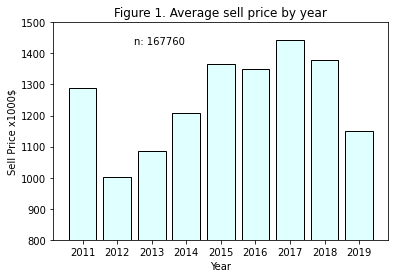

In [ ]:
# Imprimir el gráfico anterior ampliando la escala del eje y para destacar las diferencias
n = df.sellPrice.count() 

bar_list = ['2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019'] # lista de etiquetas el eje X
plt.bar(bar_list, preciomedioyear, edgecolor='black', color='lightcyan') 
plt.ylim(800,1500)
plt.title('Figure 1. Average sell price by year')
plt.ylabel('Sell Price x1000$')
plt.xlabel('Year')
plt.text(1.5, 1430, f'n: {n}')
plt.show()

Puede apreciarse que los precios de venta de las viviendas entre 2011 y 2019 se han mantenido entre 1 millón $  y 1.45 millones $, que representa una variación relativa del 45% entre el año más bajo 2012 y el más caro 2017.

 4.6- Variable Postal Code

cp
20    32.0
21    38.0
22    17.0
25     7.0
27     6.0
30     0.0
33     0.0
42     0.0
45     0.0
dtype: float64


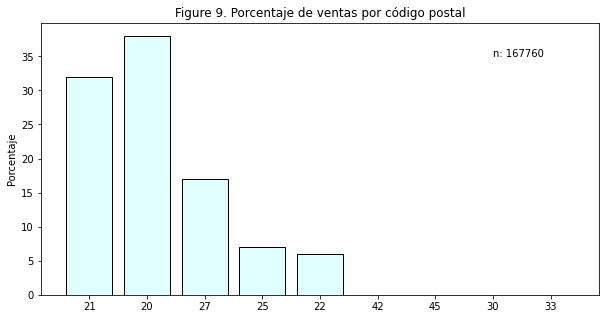

In [ ]:
df['cp'] = df['postalCode'].apply(lambda x: int(x/100))
df['cp'].unique().tolist()
pt = df.groupby(['cp']).size()
pt.head()
n = pt.sum()
pt2 = (pt/n)*100
pt2.head()
pt3 = round(pt2,0)
print(pt3)
fig = plt.figure(figsize=(10,5))
bar_list = ['21', '20', '27', '25', '22', '42', '45', '30', '33']
plt.bar(bar_list, pt3, edgecolor='black', color='lightcyan')
plt.title('Figure 9. Porcentaje de ventas por código postal')
plt.ylabel('Porcentaje')
plt.text(7, 35, f'n: {n}')
plt.show()

Los 5 códigos postales más numerosos, los acabados en 21, 20, 27,25 y 22, son los más numerosos dentro del dataset y aportan el 100% de los datos.

  5. **Hipótesis.**

HIPÓTESIS 1:

*   HO: El número de camas no influye en el precio de venta.
*   H1: A mayor número de camas, mayor precio de venta.




En primer lugar, se realiza el estadístico con el objetivo de rechazar la hipótesis nula o aceptarla.

In [ ]:
df.loc[ (df['bed']==1.0), "bed_cat"]= "1" 
df.loc[ (df['bed']==2.0), "bed_cat"]= "2" 
df.loc[ (df['bed']==3.0), "bed_cat"]= "3" 
df.loc[ (df['bed']==4.0), "bed_cat"]= "4" 
df.loc[ (df['bed']==5.0), "bed_cat"]= "5" 
df.loc[ (df['bed']==6.0), "bed_cat"]= "6" 
df.loc[ (df['bed']==7.0), "bed_cat"]= "7" 
df.loc[ (df['bed']==8.0), "bed_cat"]= "8"
df.loc[ (df['bed']==9.0), "bed_cat"]= "9"

pd.crosstab(df.bed, df.bed_cat)

my_categories1=["1","2","3", "4", "5", "6", "7", "8", "9"]

my_bed_type = CategoricalDtype(categories=my_categories1, ordered=True) 
df["bed_cat2"] = df.bed_cat.astype(my_bed_type) 
df

sellPrice_b1=df.loc[df.bed_cat2=="1", 'sellPrice']
sellPrice_b2=df.loc[df.bed_cat2=="2", 'sellPrice']
sellPrice_b3=df.loc[df.bed_cat2=="3", 'sellPrice']
sellPrice_b4=df.loc[df.bed_cat2=="4", 'sellPrice']
sellPrice_b5=df.loc[df.bed_cat2=="5", 'sellPrice']
sellPrice_b6=df.loc[df.bed_cat2=="6", 'sellPrice']
sellPrice_b7=df.loc[df.bed_cat2=="7", 'sellPrice']
sellPrice_b8=df.loc[df.bed_cat2=="8", 'sellPrice']
sellPrice_b9=df.loc[df.bed_cat2=="9", 'sellPrice']

n = df.sellPrice.count() 
m = round(df.sellPrice.mean(),2)
f, p_val =(stats.f_oneway(sellPrice_b1, sellPrice_b2,sellPrice_b3,sellPrice_b4,sellPrice_b5,sellPrice_b6,sellPrice_b7,sellPrice_b8,sellPrice_b9))
print(f,p_val)
f2 = round(f, 3)
p_val2 = round(p_val, 4)
print(f'f: {f2} , p-val: {p_val} , n: {n}')

35.985887091644614 1.749996304901781e-57
f: 35.986 , p-val: 1.749996304901781e-57 , n: 167760


Como se puede observar, la hipótesis nula es rechazada ya que el P-value es menor a 0'05, por lo tanto el precio de las viviendas aumenta si la vivienda dispone de un mayor número de dormitorios.

Text(0.5, 1.0, 'Figure 1. Precio medio por número de habitaciones.\n')

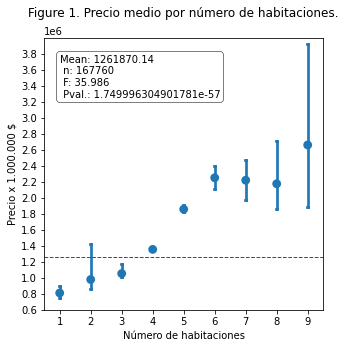

In [ ]:
plt.figure(figsize=(5,5))
ax = sns.pointplot(x="bed_cat2", y="sellPrice", data=df, capsize=0.05, ci=99.9, join=0) 
ax.set_ylabel('')
plt.yticks(np.arange(600000, 4000000, step=200000))
plt.ylim(600000,4000000)
plt.axhline(y=df.sellPrice.mean(), linewidth=1,
            linestyle= 'dashed',
            color="green")
props = dict(boxstyle='round', facecolor='white', lw=0.5)
plt.text(0, 3256839, f'Mean: {m}\n n: {n}\n F: {f2}\n Pval.: {p_val}', bbox=props)
plt.xlabel('Número de habitaciones')
plt.ylabel('Precio x 1.000.000 $')
plt.title('Figure 10. Precio medio por número de habitaciones.''\n')


En este gráfico se puede observar que a mayor número de habitaciones, mayor precio de venta, confirmando la hipótesis alternativa H1 y rechazando la hipótesis nula H0 con p-value < 0,05.

HIPÓTESIS 2:

*   HO: El número de baños no influye en el precio de venta.
*   H1: A mayor número de baños, mayor precio de venta.


In [ ]:
#Listamos la variable "bath"

lista = set(df['bath'])
print(lista)

{1, 2, 3, 4, 5, 6, 7, 8, 9}


In [ ]:
# Recodificamos la varibale "bath", en la que, se verán representadas el número de baños

df.loc[ (df['bath']==1.0), "bath_cat"]= "1" 
df.loc[ (df['bath']==2.0), "bath_cat"]= "2" 
df.loc[ (df['bath']==3.0), "bath_cat"]= "3" 
df.loc[ (df['bath']==4.0), "bath_cat"]= "4" 
df.loc[ (df['bath']==5.0), "bath_cat"]= "5" 
df.loc[ (df['bath']==6.0), "bath_cat"]= "6" 
df.loc[ (df['bath']==7.0), "bath_cat"]= "7" 
df.loc[ (df['bath']==8.0), "bath_cat"]= "8"
df.loc[ (df['bath']==8.0), "bath_cat"]= "9"

In [ ]:
#Hacemos una tabla cruzada de la variable original contra la nueva para comprobar que está bien hecha

pd.crosstab(df.bath, df.bath_cat)  

bath_cat,1,2,3,4,5,6,7,9
bath,,,,,,,,
1,61860,0,0,0,0,0,0,0
2,0,72640,0,0,0,0,0,0
3,0,0,26647,0,0,0,0,0
4,0,0,0,5042,0,0,0,0
5,0,0,0,0,1172,0,0,0
6,0,0,0,0,0,292,0,0
7,0,0,0,0,0,0,78,0
8,0,0,0,0,0,0,0,23


In [ ]:
# Convertimos la variable "bath_cat" en una variable categorica

#Creamos my_categories que reprensenta las diferentes categorias de nuestra variable 
my_categories=["1","2","3", "4", "5", "6", "7", "8","9"]

#Definimos el nuevo tipo de dato y le decimos que la lista esta ordenada mediante ordered=true
my_pref_mod_type = CategoricalDtype(categories=my_categories, ordered=True) 

#Forzamos a la variable a ser una variable categorica. Para ello generaramos la nueva columna que va ser las pref_mod_cat_2 forzandola a que sea una varibale categorica 
df["bath_cat2"] = df.bath_cat.astype(my_pref_mod_type) 

In [ ]:
sellPriceB_1=df.loc[df.bath_cat2=="1", 'sellPrice']
sellPriceB_2=df.loc[df.bath_cat2=="2", 'sellPrice']
sellPriceB_3=df.loc[df.bath_cat2=="3", 'sellPrice']
sellPriceB_4=df.loc[df.bath_cat2=="4", 'sellPrice']
sellPriceB_5=df.loc[df.bath_cat2=="5", 'sellPrice']
sellPriceB_6=df.loc[df.bath_cat2=="6", 'sellPrice']
sellPriceB_7=df.loc[df.bath_cat2=="7", 'sellPrice']
sellPriceB_8=df.loc[df.bath_cat2=="8", 'sellPrice']
sellPriceB_9=df.loc[df.bath_cat2=="9", 'sellPrice']

#Obtenermos el PValue mediante el estadistico F 
res=stats.f_oneway(sellPriceB_1, sellPriceB_2,sellPriceB_3,sellPriceB_4,sellPriceB_5,sellPriceB_6,sellPriceB_7,sellPriceB_8,sellPriceB_9)
print(res)
n = df.sellPrice.count() 

F_onewayResult(statistic=nan, pvalue=nan)


/usr/local/lib/python3.7/dist-packages/scipy/stats/stats.py:3339: RuntimeWarning: invalid value encountered in double_scalars
  ssbn += _square_of_sums(a - offset) / len(a)


Text(0.5, 1.0, 'Figure 1. Precio medio por número de baños.\n')

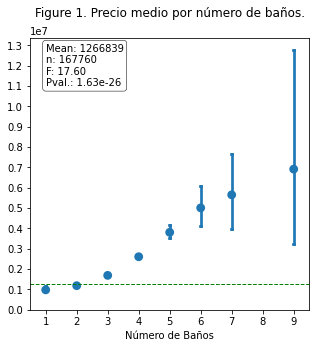

In [ ]:
plt.figure(figsize=(5,5))
ax = sns.pointplot(x="bath_cat2", y="sellPrice", data=df, capsize=0.05, ci=99.9, join=0) 
ax.set_ylabel('')
plt.yticks(np.arange(0, 14000000, step=1000000))
#plt.ylim(600000,4500000)
plt.axhline(y=df.sellPrice.mean(), linewidth=1,
            linestyle= 'dashed',
            color="green")
props = dict(boxstyle='round', facecolor='white', lw=0.5)
plt.text(0, 11000000, 'Mean: 1266839''\n''n: 167760' '\n' 'F: 17.60''\n' 'Pval.: 1.63e-26', bbox=props)
plt.xlabel('Número de Baños')
plt.title('Figure 11. Precio medio por número de baños.''\n')

Sabiendo que el p-value es < 0.05, podemos rechazar con certeza la hipótesis nula de que a mayor número de baños no aumenta el precio de venta. Esto es debido a que el nivel de significatividad es menor o igual al 5%. Es decir, el nº de baños influye claramente en el precio de venta. Otro argumento sería el que hay un 0% de probabilidad de que nuestra hpótesis se deba al azar.

Por lo tanto:
*   Rechazamos la hipótesis nula
*   Aceptamos la hipótesis alternativa, sí influye el nº de baños en el precio de venta de la vivienda.



HIPÓTESIS 3:

*   HO: El número de plazas de garaje no influye en el precio de venta.
*   H1: A mayor número de plazas de garaje , mayor precio de venta.


In [ ]:
#Listamos la variable "car"

lista = set(df['car'])
print(lista)

{1.0, 2.0, 3.0, 4.0, 1.916531471471077, 5.0, 7.0, 6.0, 9.0, 8.0}


In [ ]:
# Recodificamos la varibale "car", en la que, se verán representadas el número de coches

df.loc[ (df['car']==1.0), "car_cat"]= "1" 
df.loc[ (df['car']==2.0), "car_cat"]= "2" 
df.loc[ (df['car']==3.0), "car_cat"]= "3" 
df.loc[ (df['car']==4.0), "car_cat"]= "4" 
df.loc[ (df['car']==5.0), "car_cat"]= "5" 
df.loc[ (df['car']==6.0), "car_cat"]= "6" 
df.loc[ (df['car']==7.0), "car_cat"]= "7" 
df.loc[ (df['car']==8.0), "car_cat"]= "8"
df.loc[ (df['car']==9.0), "car_cat"]= "9"

In [ ]:
#Hacemos una tabla cruzada de la variable original contra la nueva para comprobar que está bien hecha

pd.crosstab(df.car, df.car_cat)  

car_cat,1,2,3,4,5,6,7,8,9
car,,,,,,,,,
1.0,52320,0,0,0,0,0,0,0,0
2.0,0,76360,0,0,0,0,0,0,0
3.0,0,0,13068,0,0,0,0,0,0
4.0,0,0,0,7469,0,0,0,0,0
5.0,0,0,0,0,1417,0,0,0,0
6.0,0,0,0,0,0,1093,0,0,0
7.0,0,0,0,0,0,0,214,0,0
8.0,0,0,0,0,0,0,0,243,0
9.0,0,0,0,0,0,0,0,0,65


In [ ]:
# Convertimos la variable "car_cat" en una variable categorica

#Creamos my_categories que reprensenta las diferentes categorias de nuestra variable 
my_categories=["1","2","3", "4", "5", "6", "7", "8", "9"]

#Definimos el nuevo tipo de dato y le decimos que la lista esta ordenada mediante ordered=true
my_pref_mod_type = CategoricalDtype(categories=my_categories, ordered=True) 

#Forzamos a la variable a ser una variable categorica. Para ello generaramos la nueva columna que va ser las pref_mod_cat_2 forzandola a que sea una varibale categorica 
df["car_cat2"] = df.car_cat.astype(my_pref_mod_type) 

In [ ]:
#Comprobamos que la variable "sellPrice_cat" se ha convertido en una variable categorica
df.dtypes

Id                  int64
suburb             object
postalCode          int64
sellPrice           int64
bed               float64
bath                int64
car               float64
propType           object
sellPrice_str      object
sellPrice_cat    category
cp                  int64
bed_cat            object
bed_cat2         category
bath_cat           object
bath_cat2        category
car_cat            object
car_cat2         category
dtype: object

In [ ]:
sellPriceC_1=df.loc[df.car_cat2=="1", 'sellPrice']
sellPriceC_2=df.loc[df.car_cat2=="2", 'sellPrice']
sellPriceC_3=df.loc[df.car_cat2=="3", 'sellPrice']
sellPriceC_4=df.loc[df.car_cat2=="4", 'sellPrice']
sellPriceC_5=df.loc[df.car_cat2=="5", 'sellPrice']
sellPriceC_6=df.loc[df.car_cat2=="6", 'sellPrice']
sellPriceC_7=df.loc[df.car_cat2=="7", 'sellPrice']
sellPriceC_8=df.loc[df.car_cat2=="8", 'sellPrice']
sellPriceC_9=df.loc[df.car_cat2=="9", 'sellPrice']

#Obtenermos el PValue mediante el estadistico F 
res=stats.f_oneway(sellPriceC_1, sellPriceC_2,sellPriceC_3,sellPriceC_4,sellPriceC_5,sellPriceC_6,sellPriceC_7,sellPriceC_8,sellPriceC_9)
print(res)

F_onewayResult(statistic=12.501446473721707, pvalue=4.308099909117071e-18)


Hemos obtenido un Pvalue 1.63e-26 siendo < 0,05, por lo que, la variable predictiva "car" tiene impacto sobre la variable target "sellPrice". Pudiendo así, extrapolar los resultados obtenidos a la poblacion con una confianza mayor al 95%.

Por lo tanto:


*   Rechazamos la hipótesis nula
*   Aceptamos la hipótesis alternativa, sí influye el nº de plazas de párking en el precio de la vivienda




Text(0.5, 1.0, 'Figure 12. Precio medio por número de garajes.\n')

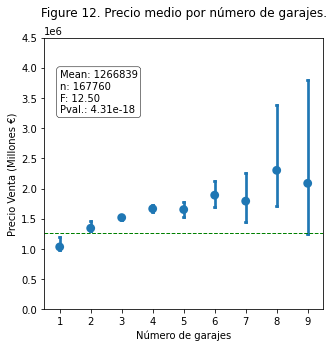

In [ ]:
#Reprensentación Gráfica

plt.figure(figsize=(5,5))
ax = sns.pointplot(x="car_cat2", y="sellPrice", data=df, capsize=0.05, ci=99.9, join=0) 
ax.set_ylabel('')
plt.yticks(np.arange(0, 5000000, step=500000))
#plt.ylim(600000,4000000)
plt.axhline(y=df.sellPrice.mean(), linewidth=1,
            linestyle= 'dashed',
            color="green")
props = dict(boxstyle='round', facecolor='white', lw=0.5)
plt.text(0, 3256839, 'Mean: 1266839''\n''n: 167760' '\n' 'F: 12.50''\n' 'Pval.: 4.31e-18', bbox=props)
plt.xlabel('Número de garajes')
plt.ylabel('Precio Venta (Millones $)')
plt.title('Figure 12. Precio medio por número de garajes.''\n')

Gráficamente podemos visualizar de forma más sencilla lo mencionado con anterioridad.
Viendo que a mayor número de garajes tenga la casa el precio de venta de esta incrementará. De nuevo rechazando la hipótesis nula y aceptando la alternativa.

HIPÓTESIS 4:

*   HO: El tipo de casa no influye en el precio de venta.
*   H1: El tipo de casa influye en el precio de venta.


Listamos los tipos de propiedades que existen en el dataframe:

In [ ]:
df['propType'].unique().tolist()

['house',
 'townhouse',
 'duplex/semi-detached',
 'villa',
 'other',
 'terrace',
 'warehouse',
 'acreage']

Procedemos a realizar la hipótesis

In [ ]:
pt_acreage=df.loc[df.propType == 'acreage', "sellPrice"]
pt_duplex=df.loc[df.propType == 'duplex/semi-detached', "sellPrice"]
pt_house=df.loc[df.propType == 'house', "sellPrice"]
pt_other=df.loc[df.propType == 'other', "sellPrice"]
pt_terrace=df.loc[df.propType == 'terrace', "sellPrice"]
pt_townhouse=df.loc[df.propType == 'townhouse', "sellPrice"]
pt_villa=df.loc[df.propType == 'villa', "sellPrice"]
pt_warehouse=df.loc[df.propType == 'warehouse', "sellPrice"]

stats.f_oneway(pt_acreage, pt_duplex, pt_house, pt_other, pt_terrace, pt_townhouse, pt_villa, pt_warehouse)

F_onewayResult(statistic=8.876839848156234, pvalue=5.6687067168875423e-11)

Como el p-value es menor que 0,05, se puede decir que la hipótesis nula es rechazada, el tipo de casa sí influye en el precio de venta.

Text(0.5, 1.0, 'Figure 13. Precio medio por tipo de propiedad.\n')

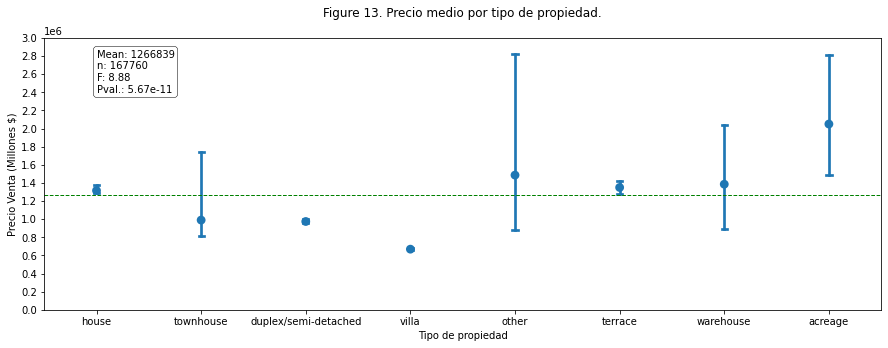

In [ ]:
plt.figure(figsize=(15,5))
ax = sns.pointplot(x="propType", y="sellPrice", data=df, capsize=0.05, ci=99.9, join=0)
ax.set_ylabel('Precio Venta (Millones $)')
plt.yticks(np.arange(0, 3.2e+06, step=2e+05))
#plt.ylim(1e+05, 3e+06)
plt.axhline(y=df.sellPrice.mean(),linewidth=1,linestyle= 'dashed', color="green")
bar_list = ["Acreage", "Duplex.", "House", "Other", "Terra.", "TownH.", "Villa.", "WareH."]
props = dict(boxstyle='round', facecolor='white', lw=0.5)
plt.text(0, 2.4e+6, 'Mean: 1266839''\n''n: 167760' '\n' 'F: 8.88' '\n' 'Pval.: 5.67e-11', bbox=props)
plt.xlabel('Tipo de propiedad')
plt.title('Figure 13. Precio medio por tipo de propiedad.''\n')

Podemos observar que en los tipos de propiedades townhouse, other, warehouse y acreage tenemos una amplia variación de precios.

En cambio, para los tipos de propiedades house, duplex/semi-detached, villa y terrace no hay tanta variación de precio.

Este gráfico nos verifica que cada tipo de vivienda tiene unos precios distintos, soportando la H1 de que dependiendo de la vivienda tenemos medias de precio distintas.

HIPÓTESIS 5:

*   HO: La zona residencial (código postal) no influye en el precio de venta.
*   H1: La zona residencial (código postal) influye en el precio de venta.

In [ ]:
values=[21, 20, 27, 25, 22]
filtered_df = df[df.cp.isin(values)]
cp_21=filtered_df.loc[filtered_df.cp == 21, "sellPrice"]
cp_20=filtered_df.loc[filtered_df.cp == 20, "sellPrice"]
cp_27=filtered_df.loc[filtered_df.cp == 27, "sellPrice"]
cp_25=filtered_df.loc[filtered_df.cp == 25, "sellPrice"]
cp_22=filtered_df.loc[filtered_df.cp == 22, "sellPrice"]

stats.f_oneway(cp_21, cp_20, cp_27, cp_25, cp_22)

F_onewayResult(statistic=92.4319927036221, pvalue=1.1781091305641855e-78)

Como podemos observar, el p-value es menor que 0,05, por lo tanto se procede a rechazar la H0, entonces el código postal sí tiene influencia en el precio de venta.

Text(0.5, 1.0, 'Figure 14. Precio medio por código postal.\n')

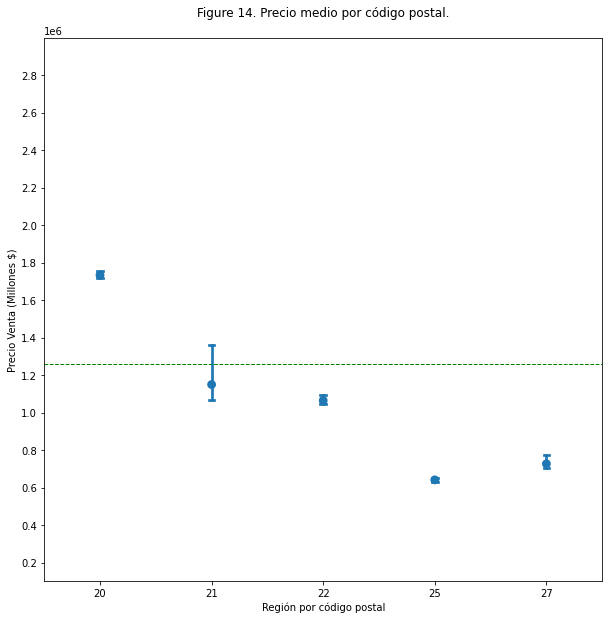

In [ ]:
plt.figure(figsize=(10,10))
ax = sns.pointplot(x="cp", y="sellPrice", data=filtered_df, capsize=0.05, ci=99.9, join=0)
ax.set_ylabel('Precio Venta (Millones $)')
plt.yticks(np.arange(0, 3e+06, step=2e+05))
plt.ylim(1e+05, 3e+06)
plt.axhline(y=df.sellPrice.mean(),linewidth=1,linestyle= 'dashed', color="green")
bar_list = [21, 20, 27, 25, 22]
props = dict(boxstyle='round', facecolor='white', lw=0.5)
plt.text(1.5, 5000, 'Mean: 1266839''\n''n: 167760' '\n' 'F: 92.43' '\n' 'Pval.: 1.18e-78', bbox=props)
plt.xlabel('Región por código postal')
plt.title('Figure 14. Precio medio por código postal.''\n')

Podemos observar que la media de los precios pagados por las viviendas dependen del código postal donde se quiera comprar la vivienda. Por lo que se apoya la H1, rechazando la hipótesis nula.

6. **Regresión.**

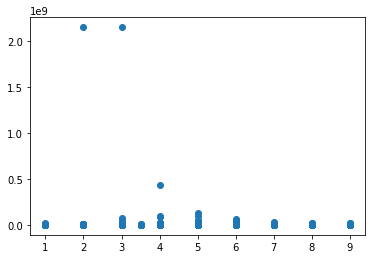

In [ ]:
plt.scatter(df.bed, df.sellPrice)

In [ ]:
model1 = ols('sellPrice ~ bed', data=df).fit() # primero la dependiente(target, luego la independiente)

print(model1.summary2())

                    Results: Ordinary least squares
Model:                OLS              Adj. R-squared:     0.002       
Dependent Variable:   sellPrice        AIC:                5790117.7365
Date:                 2021-12-24 09:26 BIC:                5790137.7970
No. Observations:     167760           Log-Likelihood:     -2.8951e+06 
Df Model:             1                F-statistic:        258.0       
Df Residuals:         167758           Prob (F-statistic): 5.29e-58    
R-squared:            0.002            Scale:              5.7133e+13  
-----------------------------------------------------------------------
             Coef.     Std.Err.     t    P>|t|     [0.025      0.975]  
-----------------------------------------------------------------------
Intercept 204829.7137 68352.6784  2.9967 0.0027  70859.9591 338799.4683
bed       301953.1349 18800.4539 16.0609 0.0000 265104.6565 338801.6134
-----------------------------------------------------------------------
Omnibus:    

El primer modelo de regresión obtiene un p-value < 0,05 por lo tanto la variable BEDS es significativa para el modelo, aunque su relevancia es muy baja, R2 es tan solo de 0.002 .
El precio de partida si bed fuera cero sería de 896272 $.

Ahora, se procede a introducir una segunda variable al modelo de regresión.

In [ ]:
model2 = ols('sellPrice ~ bed + bath', data=df).fit() 

print(model2.summary2())

                    Results: Ordinary least squares
Model:                OLS              Adj. R-squared:     0.003       
Dependent Variable:   sellPrice        AIC:                5789894.0467
Date:                 2021-12-24 09:26 BIC:                5789924.1376
No. Observations:     167760           Log-Likelihood:     -2.8949e+06 
Df Model:             2                F-statistic:        242.1       
Df Residuals:         167757           Prob (F-statistic): 1.05e-105   
R-squared:            0.003            Scale:              5.7057e+13  
-----------------------------------------------------------------------
             Coef.     Std.Err.     t    P>|t|     [0.025      0.975]  
-----------------------------------------------------------------------
Intercept 263107.9957 68416.9146  3.8457 0.0001 129012.3397 397203.6518
bed        56151.4770 24910.1284  2.2542 0.0242   7328.1701 104974.7838
bath      426352.5717 28370.7453 15.0279 0.0000 370746.5316 481958.6119
------------

Añadiendo una segunda variable, BATH (nº de baños) a BED (nº habitaciones) el modelo mejora muy ligeramente. R2 cambia de 0.002 a 0.003 .
Ambas variables bath y bed son significativas con p-value < 0.05 aunque el p-value de bed empeora de 0,000 a 0,0242 .
El precio de partida si bed y bath son cero sería de 896810 $, muy similar al modelo 1.

Ahora, se introduce una tercera variable al modelo de regresión.

In [ ]:
model3 = ols('sellPrice ~ bed + bath + car', data=df).fit() 

print(model3.summary2())

                    Results: Ordinary least squares
Model:                OLS              Adj. R-squared:     0.003       
Dependent Variable:   sellPrice        AIC:                5789886.2551
Date:                 2021-12-24 09:26 BIC:                5789926.3763
No. Observations:     167760           Log-Likelihood:     -2.8949e+06 
Df Model:             3                F-statistic:        164.7       
Df Residuals:         167756           Prob (F-statistic): 1.40e-106   
R-squared:            0.003            Scale:              5.7054e+13  
-----------------------------------------------------------------------
             Coef.     Std.Err.     t    P>|t|     [0.025      0.975]  
-----------------------------------------------------------------------
Intercept 203486.2313 71018.8021  2.8652 0.0042  64290.9326 342681.5300
bed        43013.3917 25260.8450  1.7028 0.0886  -6497.3119  92524.0953
bath      414368.3139 28627.3459 14.4746 0.0000 358259.3422 470477.2857
car        6

Al añadir una tercera variable bed, bath, car, al modelo de regresión para predecir el precio de venta de las viviendas en Sidney, apenas mejora respecto al anterior modelo con dos variables.
R2 se mantiene en 0.003 .
La variable bed deja de ser significativa al obtener un p-value de 0.0886 que es mayor de 0,05.
El precio de partida si bed, bath y car son cero sería de 203486 $, disminuyendo mucho desde el modelo 1 y 2, por lo que parece que la introducción de la variable CAR distorsiona el modelo y no es útil.